In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [2]:
df_c=pd.read_csv('FINAL CALL DATA.csv')
df_c

,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS
0,172.17,0.008219,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0,25.282476
1,172.17,0.008219,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0,22.279862
2,172.17,0.008219,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5,19.761204
3,172.17,0.008219,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0,17.274256
4,172.17,0.008219,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5,14.746163
...,...,...,...,...,...,...,...,...,...,...,...
277006,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778
277007,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164
277008,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698
277009,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689


In [3]:
n = len(df_c)
n_train =  (int)(0.7 * n)
print(n_train)

193907


In [4]:
train = df_c[0:n_train]
X_train = train[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [C_IV]', ' [C_GAMMA]', ' [C_VEGA]', ' [C_RHO]', ' [C_DELTA]', ' [C_THETA]']].values
y_train = train[' [C_LAST]'].values

In [5]:
test = df_c[n_train+1:n]
X_test = test[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [C_IV]', ' [C_GAMMA]', ' [C_VEGA]', ' [C_RHO]', ' [C_DELTA]', ' [C_THETA]']].values
y_test = test[' [C_LAST]'].values

In [6]:
from keras.layers import Activation, LeakyReLU, BatchNormalization
from keras.callbacks import EarlyStopping, TensorBoard


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [8]:
# X_train_scaled=scaler.fit_transform(X_train)
# X_train_scaled.shape

In [9]:
# y_train=y_train.reshape(-1,1)
# y_train_scaled=scaler.fit_transform(y_train)

In [10]:
# y_train_scaled.shape

In [11]:
# X_train_scaled = X_train_scaled.reshape(n_train, 1, 4)
# y_train_scaled = y_train_scaled.reshape(n_train, 1, 1)
X_train = X_train.reshape(n_train, 1, 9)
y_train = y_train.reshape(n_train, 1, 1)

In [12]:
n_test = len(test)
n_test

83103

In [13]:
# X_test_scaled=scaler.fit_transform(X_test)
# y_test=y_test.reshape(-1,1)
# y_test_scaled=scaler.fit_transform(y_test)
# X_test_scaled = X_test_scaled.reshape(n_test, 1, 4)
# y_test_scaled = y_test_scaled.reshape(n_test, 1, 1)
X_test = X_test.reshape(n_test, 1, 9)
y_test = y_test.reshape(n_test, 1, 1)

In [14]:
model = Sequential()

model.add(LSTM(100, input_shape=(1, 9), return_sequences=True))
model.add(BatchNormalization())

model.add(LSTM(50, return_sequences=True))
model.add(BatchNormalization())

model.add(LSTM(20, return_sequences=False))
model.add(BatchNormalization())

model.add(Dense(1))
model.add(LeakyReLU())

model.compile(loss='mean_absolute_error', metrics=['mean_absolute_error', 'mean_squared_error'], optimizer='RMSprop')
          

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 100)            44000     
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 100)            400       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             30200     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 50)             200       
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                5680      
_________________________________________________________________
batch_normalization_2 (Batch (None, 20)                80        
_________________________________________________________________
dense (Dense)                (None, 1)                 2

In [16]:
callback_es = EarlyStopping(monitor='val_loss', patience=5, verbose=2, restore_best_weights=True)

In [17]:
history=model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=2, 
          callbacks=[callback_es], validation_data=(X_test, y_test))


Epoch 1/100
1515/1515 - 34s - loss: 9.4652 - mean_absolute_error: 9.4652 - mean_squared_error: 422.2014 - val_loss: 4.3520 - val_mean_absolute_error: 4.3520 - val_mean_squared_error: 44.8417
Epoch 2/100
1515/1515 - 27s - loss: 3.3174 - mean_absolute_error: 3.3174 - mean_squared_error: 35.4065 - val_loss: 3.7986 - val_mean_absolute_error: 3.7986 - val_mean_squared_error: 30.8576
Epoch 3/100
1515/1515 - 27s - loss: 3.1357 - mean_absolute_error: 3.1357 - mean_squared_error: 31.3394 - val_loss: 7.4860 - val_mean_absolute_error: 7.4860 - val_mean_squared_error: 79.4838
Epoch 4/100
1515/1515 - 27s - loss: 3.0247 - mean_absolute_error: 3.0247 - mean_squared_error: 29.5440 - val_loss: 3.3800 - val_mean_absolute_error: 3.3800 - val_mean_squared_error: 28.7248
Epoch 5/100
1515/1515 - 28s - loss: 2.9435 - mean_absolute_error: 2.9435 - mean_squared_error: 27.7495 - val_loss: 4.5018 - val_mean_absolute_error: 4.5018 - val_mean_squared_error: 40.0233
Epoch 6/100
1515/1515 - 27s - loss: 2.9055 - mean

In [18]:
# history=model.fit(X_train_scaled, y_train_scaled, batch_size=128, epochs=200, verbose=2, 
#           callbacks=[callback_es], validation_data=(X_test_scaled, y_test_scaled))


In [19]:
y_train_pred = model.predict(X_train)

In [20]:
# y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
y_train_pred

array([[30.275139],
       [27.064705],
       [24.435926],
       ...,
       [30.228523],
       [27.666145],
       [24.948547]], dtype=float32)

In [21]:
train['Call_LSTM']=y_train_pred
train

<ipython-input-21-c628b8c71e1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Call_LSTM']=y_train_pred


,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS,Call_LSTM
0,172.17,0.008219,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0,25.282476,30.275139
1,172.17,0.008219,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0,22.279862,27.064705
2,172.17,0.008219,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5,19.761204,24.435926
3,172.17,0.008219,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0,17.274256,21.732906
4,172.17,0.008219,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5,14.746163,19.144560
...,...,...,...,...,...,...,...,...,...,...,...,...
193902,179.02,1.649425,0.65827,0.00573,0.84465,-0.02014,1.41244,0.28033,32.60,165.0,35.369786,35.359539
193903,179.02,1.649425,0.62671,0.00588,0.87102,-0.02038,1.36556,0.27820,30.90,170.0,32.577601,32.685581
193904,179.02,1.649425,0.59577,0.00612,0.89144,-0.02070,1.31353,0.27681,27.13,175.0,29.994880,30.228523
193905,179.02,1.649425,0.56406,0.00628,0.90553,-0.02039,1.25991,0.27454,24.73,180.0,27.482092,27.666145


In [22]:
y_true=train[' [C_LAST]']
y_pred=train['Call_LSTM']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  2.9645257799350557
MSE =  22.55398811608446
RMSE =  4.7491039276988305


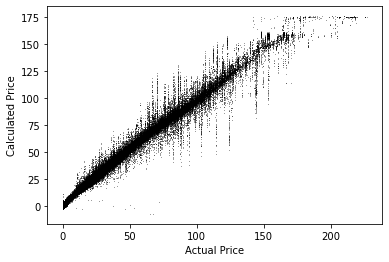

In [23]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

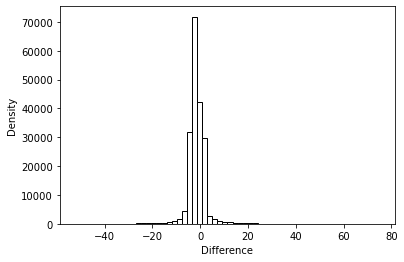

In [24]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [25]:
y_test_pred=model.predict(X_test)

In [26]:
# y_test_pred=scaler.inverse_transform(y_test_pred_scaled)

In [27]:
test['Call_LSTM']=y_test_pred
test

<ipython-input-27-fc64c810b219>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Call_LSTM']=y_test_pred


,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS,Call_LSTM
193908,179.02,1.649425,0.47056,0.00645,0.91520,-0.02033,1.08559,0.26887,18.55,195.0,20.895615,20.297199
193909,179.02,1.649425,0.44009,0.00641,0.90725,-0.02019,1.02520,0.26711,16.70,200.0,18.986668,18.550571
193910,179.02,1.649425,0.41070,0.00633,0.89419,-0.01936,0.96454,0.26497,14.95,205.0,17.174165,17.043068
193911,179.02,1.649425,0.38230,0.00629,0.87701,-0.01918,0.90546,0.26478,13.60,210.0,15.664548,15.700775
193912,179.02,1.649425,0.35522,0.00610,0.85580,-0.01888,0.84713,0.26322,12.55,215.0,14.150901,14.437885
...,...,...,...,...,...,...,...,...,...,...,...,...
277006,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778,14.243830
277007,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164,10.385163
277008,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698,4.229096
277009,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689,3.389573


In [28]:
y_true=test[' [C_LAST]']
y_pred=test['Call_LSTM']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  3.380048199950021
MSE =  28.724830607321334
RMSE =  5.359555075500329


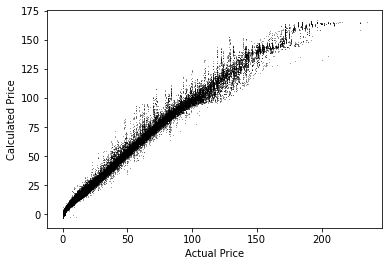

In [29]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

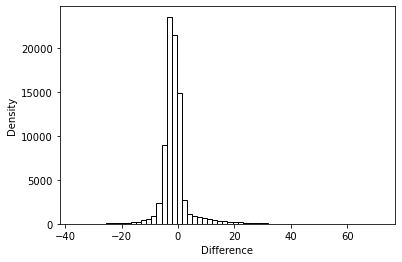

In [30]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [31]:
# train.to_csv('LSTM GREEKS CALL train FINAL Results.csv', mode='a', index=False, header=True)

In [32]:
# test.to_csv('LSTM GREEKS CALL test FINAL Results.csv', mode='a', index=False, header=True)

In [33]:
# model.save('LSTM_Call_Greeks.h5')

In [71]:
df_p=pd.read_csv('FINAL PUT DATA.csv')
df_p

,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS
0,172.17,0.008219,135.0,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.77790,0.000762
1,172.17,0.008219,140.0,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.67034,0.000797
2,172.17,0.008219,144.0,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.58576,0.000820
3,172.17,0.008219,145.0,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.56515,0.000833
4,172.17,0.008219,146.0,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.54460,0.000845
...,...,...,...,...,...,...,...,...,...,...,...
241798,293.20,2.060274,350.0,80.38,-0.69845,0.00415,1.41879,-0.02242,-5.75046,0.19411,59.202701
241799,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230
241800,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575
241801,293.20,2.060274,380.0,97.00,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552


In [72]:
n = len(df_p)
n_train =  (int)(0.7 * n)
print(n_train)

169262


In [73]:
train = df_p[0:n_train]
X_train = train[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [P_IV]', ' [P_GAMMA]', ' [P_VEGA]', ' [P_RHO]', ' [P_DELTA]', ' [P_THETA]']].values
y_train = train[' [P_LAST]'].values

In [74]:
test = df_p[n_train+1:n]
X_test = test[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [P_IV]', ' [P_GAMMA]', ' [P_VEGA]', ' [P_RHO]', ' [P_DELTA]', ' [P_THETA]']].values
y_test = test[' [P_LAST]'].values

In [75]:
X_train = X_train.reshape(n_train, 1, 9)
y_train = y_train.reshape(n_train, 1, 1)
n_test = len(test)
X_test = X_test.reshape(n_test, 1, 9)
y_test = y_test.reshape(n_test, 1, 1)

In [76]:
model2 = Sequential()

model2.add(LSTM(100, input_shape=(1, 9), return_sequences=True))
model2.add(BatchNormalization())

model2.add(LSTM(50, return_sequences=False))
model2.add(BatchNormalization())

model2.add(Dense(1))
model2.add(LeakyReLU())

model2.compile(loss='mean_absolute_error', metrics=['mean_absolute_error', 'mean_squared_error'], optimizer='RMSprop')
          

In [77]:
history=model2.fit(X_train, y_train, batch_size=128, epochs=100, verbose=2, 
          callbacks=[callback_es], validation_data=(X_test, y_test))


Epoch 1/100
1323/1323 - 20s - loss: 4.7259 - mean_absolute_error: 4.7259 - mean_squared_error: 145.1915 - val_loss: 3.5076 - val_mean_absolute_error: 3.5076 - val_mean_squared_error: 37.4887
Epoch 2/100
1323/1323 - 17s - loss: 2.9640 - mean_absolute_error: 2.9640 - mean_squared_error: 56.9935 - val_loss: 2.1967 - val_mean_absolute_error: 2.1967 - val_mean_squared_error: 20.3590
Epoch 3/100
1323/1323 - 17s - loss: 2.8265 - mean_absolute_error: 2.8265 - mean_squared_error: 52.1757 - val_loss: 1.9953 - val_mean_absolute_error: 1.9953 - val_mean_squared_error: 13.3417
Epoch 4/100
1323/1323 - 18s - loss: 2.8739 - mean_absolute_error: 2.8739 - mean_squared_error: 52.1225 - val_loss: 5.4796 - val_mean_absolute_error: 5.4796 - val_mean_squared_error: 45.3603
Epoch 5/100
1323/1323 - 17s - loss: 2.8162 - mean_absolute_error: 2.8162 - mean_squared_error: 51.1345 - val_loss: 2.3631 - val_mean_absolute_error: 2.3631 - val_mean_squared_error: 14.7528
Epoch 6/100
1323/1323 - 17s - loss: 2.7611 - mean

In [78]:
y_train_pred = model2.predict(X_train)
train['Put_LSTM']=y_train_pred
train

<ipython-input-78-43db45e0bb58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Put_LSTM']=y_train_pred


,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS,Put_LSTM
0,172.17,0.008219,135.0,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.77790,0.000762,-0.203629
1,172.17,0.008219,140.0,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.67034,0.000797,-0.198742
2,172.17,0.008219,144.0,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.58576,0.000820,-0.189866
3,172.17,0.008219,145.0,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.56515,0.000833,-0.188518
4,172.17,0.008219,146.0,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.54460,0.000845,-0.186542
...,...,...,...,...,...,...,...,...,...,...,...,...
169257,194.19,1.597370,115.0,2.64,-0.06887,0.00180,0.32254,-0.00907,-0.25549,0.30592,1.855151,1.651007
169258,194.19,1.597370,120.0,3.14,-0.08134,0.00203,0.36610,-0.00979,-0.30273,0.29955,2.223690,2.009862
169259,194.19,1.597370,130.0,4.35,-0.11056,0.00271,0.45990,-0.01202,-0.41518,0.28727,3.131459,2.918661
169260,194.19,1.597370,135.0,5.18,-0.12741,0.00297,0.50695,-0.01294,-0.47852,0.27936,3.599630,3.529143


In [79]:
y_true=train[' [P_LAST]']
y_pred=train['Put_LSTM']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  2.0713579485768863
MSE =  36.70013986344113
RMSE =  6.058064035931044


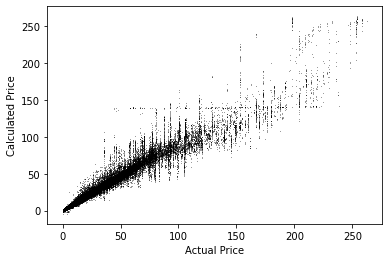

In [80]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

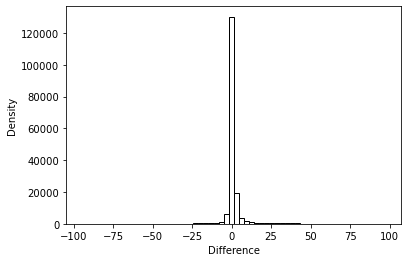

In [81]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [82]:
y_test_pred=model2.predict(X_test)
test['Put_LSTM']=y_test_pred
test

<ipython-input-82-ec15ff1c370f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Put_LSTM']=y_test_pred


,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS,Put_LSTM
169263,194.19,1.597370,155.0,9.31,-0.21728,0.00458,0.71246,-0.01784,-0.82469,0.25979,6.751424,7.057374
169264,194.19,1.597370,160.0,10.60,-0.24403,0.00499,0.75959,-0.01922,-0.93018,0.25462,7.759016,8.028967
169265,194.19,1.597370,165.0,11.85,-0.27321,0.00539,0.80422,-0.01951,-1.04431,0.24932,8.862789,9.160996
169266,194.19,1.597370,170.0,14.00,-0.30350,0.00573,0.84444,-0.02100,-1.16709,0.24518,10.166727,10.647326
169267,194.19,1.597370,175.0,15.53,-0.33531,0.00607,0.87844,-0.02109,-1.29530,0.23976,11.495512,12.551682
...,...,...,...,...,...,...,...,...,...,...,...,...
241798,293.20,2.060274,350.0,80.38,-0.69845,0.00415,1.41879,-0.02242,-5.75046,0.19411,59.202701,56.484821
241799,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230,61.585400
241800,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575,70.898766
241801,293.20,2.060274,380.0,97.00,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552,82.950043


In [83]:
y_true=test[' [P_LAST]']
y_pred=test['Put_LSTM']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  1.9952805441521617
MSE =  13.34169044537197
RMSE =  3.652627882138005


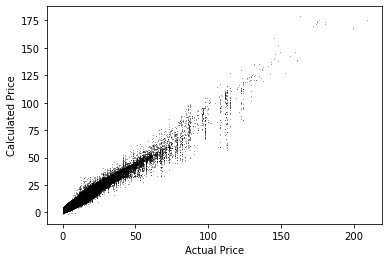

In [84]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

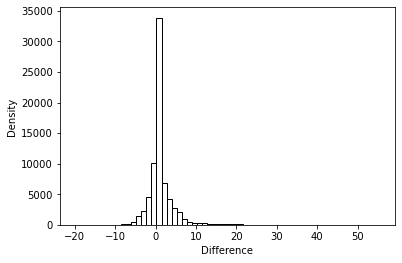

In [85]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [89]:
# train.to_csv('LSTM GREEKS PUT train FINAL Results.csv', mode='a', index=False, header=True)

In [90]:
# test.to_csv('LSTM GREEKS PUT test FINAL Results.csv', mode='a', index=False, header=True)

In [91]:
# model2.save('LSTM_Put_GREEKS.h5')